# 2023-09-01 -- Planning observations

## Observation planning for your night


This notebook focuses on two broader questions:

1. On a particular date, which times of night is it best to observe the object of interest?
1. Which times of year is it possible to observe the object of interest at a particular location?

Behind the scenes, the python package [astroplan](https://astroplan.readthedocs.io) will be used to do all of the work here. As a result, much of this notebook will focus on the mechanics of how to do that rather than on background or theory.

## Run, but do not modify, the code in the cell below

None of the following cells will run until you have run the one below.

In [1]:
# Set plotting interface
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np

# Load a couple of things needed from astroplan
from astroplan import Observer, FixedTarget
from astroplan.plots import plot_airmass, plot_finder_image, dark_style_sheet

# And load Time from astropy
from astropy.time import Time

# Load astropy units module
import astropy.units as u

# Get the latest Earth orientation information...

from astroplan import download_IERS_A
#download_IERS_A()

## Plotting visibility over one night

To see where an object will be over the course of a night, we need to let the computer know three things:

+ Where the observatory is
+ Where the object is (uses the coordinates from earlier this week)
+ When we want to know the object's location (uses times from previous class)

### Where the observatory is

Visibility depends on location, so the first step is to provide the location of the observatory. Notice that the longitude is given as degrees *east*; it should be a number between 0 and 360. The "d" after each number is short for degrees.

In [2]:
feder = Observer(latitude="46.86678d", longitude="263.54672d", elevation=311 * u.m)

In [3]:
print(feder)

<Observer: location (lon, lat, el)=(-96.45328 deg, 46.866780000000006 deg, 310.99999999975654 m),
    timezone=<UTC>>


### Where the object is

The "`FixedTarget`" object below is bascially like a `SkyCoord`. It turns out you don't have to type in the coordinates by hand in many cases -- the software can look them up for you from the name.


*Note:* Everything done below can be done for either a single object, as below, or for several objects at once. As a first example we will stick to one object, but an example with a couple of objects will be included at the end.

👇👇replace the object M-number below with your object's M-number

In [7]:
names = ['M74', 'M74', 'M52', ]#'M29', 'M76', 'M110', 'M71', 'M27', 'M45', 'M102']
my_objects = [FixedTarget.from_name(name) for name in names]
print(names, len(names))

['M74', 'M74', 'M52'] 3


### What time are we interested in?

For this example we will put in midnight tonight. At midnight the date changes, so in our time zone midnight tonight is Sep 2, 12:00 AM; on a 24 hour clock this is Sep 2, 00:00:00.

To get to UTC we add 5 hours during daylight savings time.

👇👇

In [8]:
obs_time = Time('2023-09-02T05:00:00', scale='utc')
print(obs_time)

2023-09-02T05:00:00.000


### Plot the visibility

/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astroplan/plots/time_dependent.py:196: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astroplan/plots/time_dependent.py:196: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astroplan/plots/time_dependent.py:196: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(ti

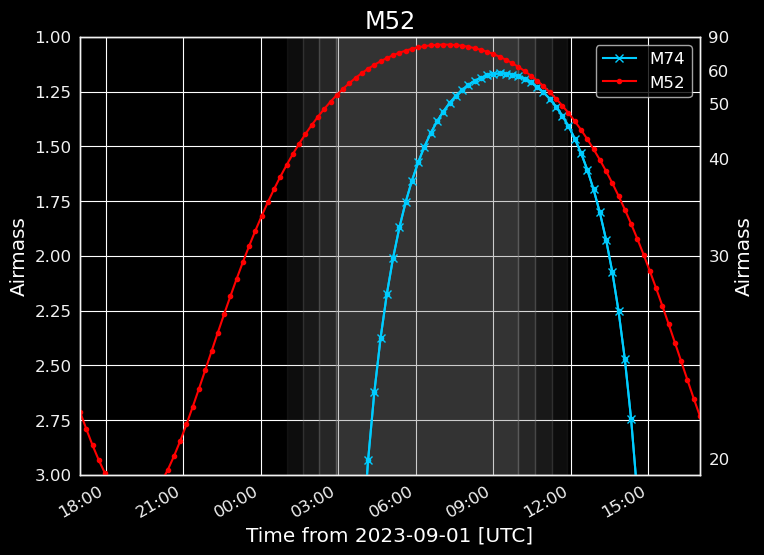

In [9]:
styles = ['solid', 'dashed', 'dotted', 'solid']
markers = ['.', 'x']

for idx, my_object in enumerate(my_objects):
    plot_airmass(my_object, feder, obs_time, 
                 brightness_shading=idx==0, 
                 altitude_yaxis=True, 
                 style_kwargs={'linestyle': styles[idx // 3], 'marker': markers[idx % 2]},
                 style_sheet=dark_style_sheet
                )
plt.grid()
plt.title(my_object.name)
plt.legend()

### Definitions of Altitude and Airmass

+ **Altitude**: How far, in degrees, an object is above the horizon. Straight up is $90^\circ$ and the horizon is $0^\circ$.

+ **Airmass**: A measure of how much atmosphere is between the telescope and space. We will work only with *relative* airmass, which is 1.0 for an object straight up and gets bigger as the object gets lower on the horizon.

### What does that mean exactly?

Go here and look up your object: https://stellarium-web.org/

## Plot airmass over a large range of dates to make a rough choice of night

The cell immediately below this generates a list of dates, 5 days apart from each other, covering 365 days.

In [10]:
times = obs_time + np.arange(0, 365, 5) * u.day

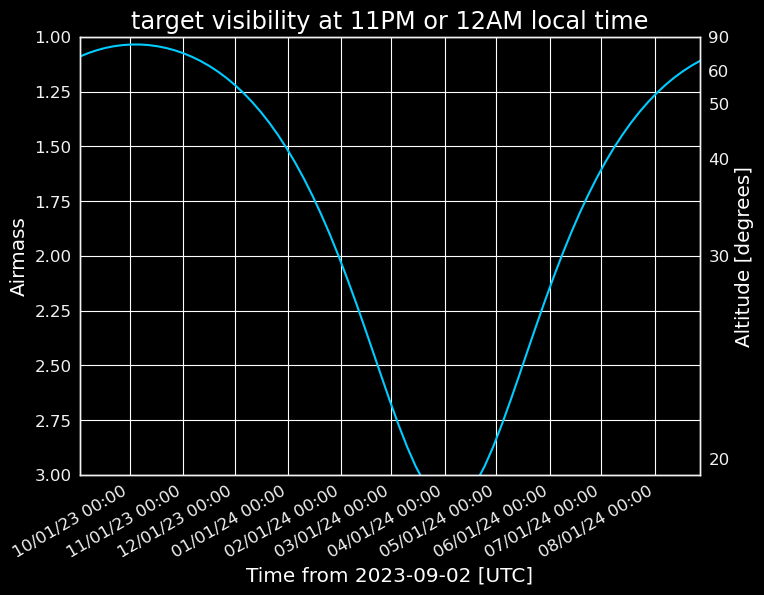

In [11]:
ax = plot_airmass(my_object, feder, times, altitude_yaxis=True)
plt.title('target visibility at 11PM or 12AM local time'.format(my_object.name))

plt.grid()

# Code below adds date to the horizontal axis
date_formatter = dates.DateFormatter('%D %H:%M')
ax.xaxis.set_major_formatter(date_formatter)

## Revising the visibility plot for a new night

From the graph above it is clear that an obsevrvation date between roughly the middle of March to the beginning of July would be better than September.

The plot below shows visibility over the night of April 1, 2024 at 11:59 CST. That is April **2**, 2023 at 04:59 UTC.

In [ ]:
obs_time = Time("2024-04-02 04:59:00", scale='utc')

In [ ]:
ax = plot_airmass(my_object, feder, obs_time, brightness_shading=True, altitude_yaxis=True)
plt.grid()
plt.title(my_object.name)

It appears M51 will be observable from roughly 2:45AM UTC (9:45:00PM CDT on 4/1) until the sky begins to brighten at 10:30UTC (5:30AM CDT)

## Creating a finding chart

A finding chart is simply a picture (or diagram) of the region of the sky surrounding the object of interest. The code below generates a chart for `my_object`. You can change the options in `plot_finder_image` to turn off the reticle, which marks the object of interest, or to turn off the grid.

In [ ]:
plt.figure(figsize=(10, 10))
ax, hdu = plot_finder_image(my_object, fov_radius=20 * u.arcmin, reticle=True, grid=True)

## Turning this into an observing plan 

An observing plan is a text file with a particular format. The example plan below is not the most complicated possibilty but gives you an idea of what the files looks like.

In [ ]:
plan = f"""
#autofocus
#repeat 10
#filter B,V,rp
#binning 1,1,1
#count 1,1,1
#interval 240,120,120

{my_object.name}\t{my_object.ra.degree}\t{my_object.dec.degree}
"""

print(plan)